In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
IMG_SIZE = (128,128)
BATCH_SIZE = 32
DATA_DIR = "../data"

In [3]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR + "/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

Found 474 files belonging to 2 classes.


Found 135 files belonging to 2 classes.
Found 70 files belonging to 2 classes.


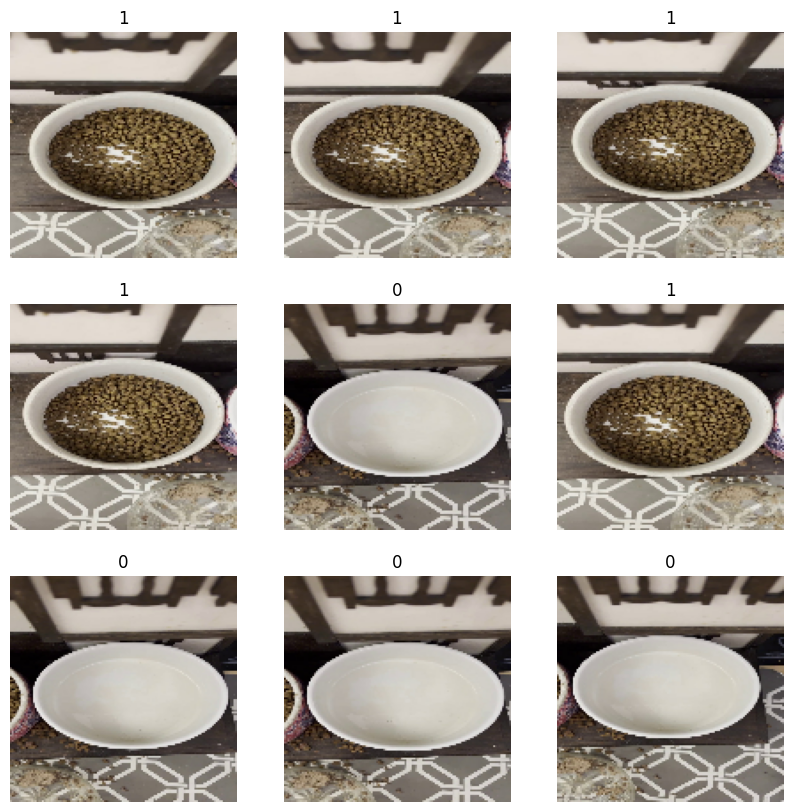

In [4]:
images, labels = next(iter(train_ds))

plt.figure(figsize=(10, 10))

for i in range(9):  
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(str(labels[i].numpy()))
    plt.axis("off")

plt.show()

In [5]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.05),
    keras.layers.RandomZoom(0.1),
])

In [6]:
base_model = keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False   # 

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.9789 - loss: 0.1735 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1

In [9]:
model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.0012     


[0.0011584419989958405, 1.0]

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  
tflite_model = converter.convert()

with open("catbowl_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\silva\AppData\Local\Temp\tmphnkp72lr\assets


INFO:tensorflow:Assets written to: C:\Users\silva\AppData\Local\Temp\tmphnkp72lr\assets


Saved artifact at 'C:\Users\silva\AppData\Local\Temp\tmphnkp72lr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2578572049680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578572045648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578572040848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578572037776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578572037584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578571706000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578571833232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578571833040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578571706192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578571830352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2